<p  style="text-align: center;"><font size="8"><b>POLICE KILLINGS IN THE USA <br>2015 to 2019</b></font></p>

<img src="https://github.com/miltonsuggs/EDA_USA-Police-Shootings/blob/master/Don't%20Shoot.jpg?raw=true" alt="Don't Shoot">  


## **INTRODUCTION**

Since its inception, police in America have continued to have a tenuous and volatile relationship with many of its citizens, especially those of lower economic status and those whose race is not classified as White. 

In this notebook I will perform a exploratory data analysis on a dataset that consists of people killed by police throughout the United States. I have also added US census data to get a clearer picture of how the racial statistics compare to those of the United States as a whole. 

I hope this notebook provides you with insights and I hope that we can work toward rectifying the racial and economic disparity that continues to fuel police brutality in these United States of America. 

<a id="top"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>

* <a href='#1'>I. LOAD LIBRARIES & PACKAGES</a>
* <a href='#2'>II. DATA OVERVIEW & INSIGHTS</a>
* <a href='#3'>III. MISSING VALUES</a>
* <a href='#4'>IV. FEATURE ENGINEERING</a>
* <a href='#5'>V. EXPLORATORY DATA ANALYSIS</a>  
    * [Univariate Data Exploration](#univariate)
    * [Timewise Data Exploration](#timewise)
    * [Bivariate Data Exploration](#bivariate)
* <a href='#6'>VI. CONCLUSION</a>

# <a id='1'>I. LOAD PACKAGES & LIBRARIES</a>

In [505]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/state-census-quickfacts/Missouri QuickFacts.csv
/kaggle/input/state-census-quickfacts/Montana QuickFacts.csv
/kaggle/input/state-census-quickfacts/Kansas QuickFacts.csv
/kaggle/input/state-census-quickfacts/West Virginia QuickFacts.csv
/kaggle/input/state-census-quickfacts/Arizona QuickFacts.csv
/kaggle/input/state-census-quickfacts/Connecticut QuickFacts.csv
/kaggle/input/state-census-quickfacts/Virginia QuickFacts.csv
/kaggle/input/state-census-quickfacts/Massachusetts QuickFacts.csv
/kaggle/input/state-census-quickfacts/Oregon QuickFacts.csv
/kaggle/input/state-census-quickfacts/Maryland QuickFacts.csv
/kaggle/input/state-census-quickfacts/Delaware QuickFacts.csv
/kaggle/input/state-census-quickfacts/Utah QuickFacts.csv
/kaggle/input/state-census-quickfacts/Vermont QuickFacts.csv
/kaggle/input/state-census-quickfacts/Oklahoma QuickFacts.csv
/kaggle/input/state-census-quickfacts/Kentucky QuickFacts.csv
/kaggle/input/state-census-quickfacts/California quickfacts.csv
/kag

# <a id='2'>II. DATA OVERVIEW & INSIGHTS</a>

In [506]:
df = pd.read_csv('/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv')
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [507]:
df_population = pd.read_csv('../input/us-census-2019-population-est/US_census_2019_quickfacts.csv')
df_population.head(25)

,Fact,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2019 (V2019),328239523,4903185,731545,7278717,3017804,39512223,5758736,3565287,973764,...,884659,6829174,28995881,3205958,623989,8535519,7614893,1792147,5822434,578759
1,Population estimates base April 1 2010 (V2019),308758105,4780125,710249,6392288,2916031,37254519,5029319,3574147,897937,...,814198,6346276,25146091,2763891,625737,8001049,6724540,1853018,5687285,563775
2,Population change - April 1 2010 (estimates b...,6.3,2.6,3.0,13.9,3.5,6.1,14.5,-0.2,8.4,...,8.7,7.6,15.3,16.0,-0.3,6.7,13.2,-3.3,2.4,2.7
3,Population Census April 1 2010,308745538,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,Persons under 5 years,6.0,6.0,7.0,5.9,6.2,6.0,5.8,5.1,5.6,...,6.9,6.0,6.9,7.7,4.7,5.9,6.0,5.2,5.7,6.0
5,Persons under 18 years,22.3,22.2,24.6,22.5,23.2,22.5,21.9,20.4,20.9,...,24.5,22.1,25.5,29.0,18.3,21.8,21.8,20.1,21.8,23.1
6,Persons 65 years and over,16.5,17.3,12.5,18.0,17.4,14.8,14.6,17.7,19.4,...,17.2,16.7,12.9,11.4,20.0,15.9,15.9,20.5,17.5,17.1
7,Female persons,50.8,51.7,47.9,50.3,50.9,50.3,49.6,51.2,51.7,...,49.5,51.2,50.3,49.6,50.6,50.8,49.9,50.5,50.2,49.1
8,White alone,76.3,69.1,65.3,82.6,79.0,71.9,86.9,79.7,69.2,...,84.6,78.4,78.7,90.6,94.2,69.4,78.5,93.5,87.0,92.5
9,Black or African American alone,13.4,26.8,3.7,5.2,15.7,6.5,4.6,12.2,23.2,...,2.3,17.1,12.9,1.5,1.4,19.9,4.4,3.6,6.7,1.3


In [508]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [510]:
df.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,5416.000000,5416,5416,5416,5189,5181.000000,5414,4895,5416,5416,5416,5416,5167,5416
unique,NaN,5206,1844,2,93,NaN,2,6,2470,51,2,3,4,2
top,NaN,TK TK,2018-01-06,shot,gun,NaN,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,NaN,187,9,5146,3060,NaN,5176,2476,85,799,4200,3495,3411,4798
mean,3010.398264,NaN,NaN,NaN,NaN,37.117931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1695.786456,NaN,NaN,NaN,NaN,13.116135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1545.750000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3009.500000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4486.250000,NaN,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **CARDINALITY**

In [511]:
cardinality={}
for col in df.columns:
    cardinality[col] = df[col].nunique()

cardinality

{'id': 5416,
 'name': 5206,
 'date': 1844,
 'manner_of_death': 2,
 'armed': 93,
 'age': 77,
 'gender': 2,
 'race': 6,
 'city': 2470,
 'state': 51,
 'signs_of_mental_illness': 2,
 'threat_level': 3,
 'flee': 4,
 'body_camera': 2}

In [512]:
print('MANNER OF DEATH')
print(df['manner_of_death'].unique())
print('-'*40)
print('RACE')
print(df['race'].unique())
print('-'*40)
print('THREAT LEVEL')
print(df['threat_level'].unique())
print('-'*40)
print('FLEE')
print(df['flee'].unique())


MANNER OF DEATH
['shot' 'shot and Tasered']
----------------------------------------
RACE
['A' 'W' 'H' 'B' 'O' nan 'N']
----------------------------------------
THREAT LEVEL
['attack' 'other' 'undetermined']
----------------------------------------
FLEE
['Not fleeing' 'Car' 'Foot' 'Other' nan]


# <a id="3">III. MISSING VALUES</a>


In [513]:
missing_values = df.isnull()
missing_values.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [514]:
for column in missing_values.columns.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print('')

id
False    5416
Name: id, dtype: int64

name
False    5416
Name: name, dtype: int64

date
False    5416
Name: date, dtype: int64

manner_of_death
False    5416
Name: manner_of_death, dtype: int64

armed
False    5189
True      227
Name: armed, dtype: int64

age
False    5181
True      235
Name: age, dtype: int64

gender
False    5414
True        2
Name: gender, dtype: int64

race
False    4895
True      521
Name: race, dtype: int64

city
False    5416
Name: city, dtype: int64

state
False    5416
Name: state, dtype: int64

signs_of_mental_illness
False    5416
Name: signs_of_mental_illness, dtype: int64

threat_level
False    5416
Name: threat_level, dtype: int64

flee
False    5167
True      249
Name: flee, dtype: int64

body_camera
False    5416
Name: body_camera, dtype: int64



In [515]:
missing_percentage = (missing_values.sum()*100)/df.shape[0]
missing_percentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
dtype: float64

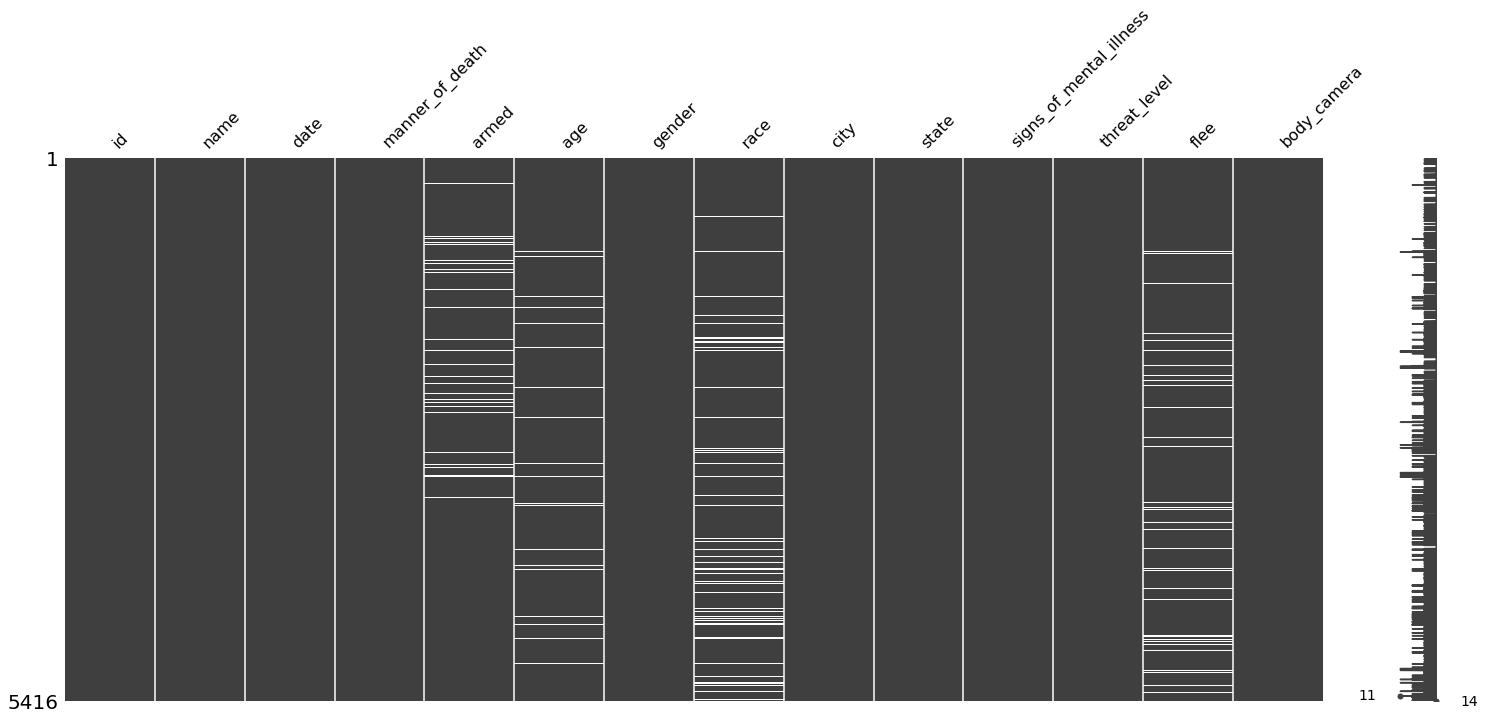

In [516]:
msno.matrix(df)

In [517]:
#DROP NULL VALUES

df.dropna(inplace=True)

# <a id="4">IV. FEATURE ENGINEERING</a>

In [518]:
# SEPARATE DAY, MONTH, YEAR INTO INDIVIDUAL COLUMNS
df['date']=pd.to_datetime(df['date'])
df['year']=pd.to_datetime(df['date']).dt.year
df['month']=pd.to_datetime(df['date']).dt.month
df['month_name']=df['date'].dt.strftime('%B')
df['month_num']=df['date'].dt.strftime('%m')
df['weekday']=df['date'].dt.strftime('%A')  
df['date_num']=df['date'].dt.strftime('%d').astype(int)
df['year_month']=df.date.dt.to_period("M")

# CLASSIFY VICTIM AGES INTO AGE RANGE GROUPS
df['age_range']=np.where(df['age']<18,'<18',np.where((df['age']>=18)&(df['age']<=35),'18-35',
np.where((df['age']>=36)&(df['age']<=50),'36-50', np.where(df['age']>65,'65+',
np.where((df['age']>=51)&(df['age']<=65),'51-65',"Not Specified")))))

# CHANGE ORDER OF COLUMNS
cols = ['id', 'name', 'age', 'age_range', 'gender', 'race', 'manner_of_death', 'armed', 'flee', 
        'signs_of_mental_illness', 'threat_level', 'body_camera', 'city', 'state',
        'date', 'date_num', 'year', 'year_month', 'month', 'month_name', 'month_num', 'weekday']
df=df[cols]

#REPLACE VALUES OF RACE COLUMN WITH FULL NAME
for i in df['race']:
        df['race'].replace({'A':'Asian', 'W':'White', 'H':'Hispanic', 'B':'Black', 'O':'Other', 'N':'Native'}, inplace=True)

# DROP YEAR 2020 From dataset

df = df[df['year'] != 2020]

df.head(3)

,id,name,age,age_range,gender,race,manner_of_death,armed,flee,signs_of_mental_illness,...,city,state,date,date_num,year,year_month,month,month_name,month_num,weekday
0,3,Tim Elliot,53.0,51-65,M,Asian,shot,gun,Not fleeing,True,...,Shelton,WA,2015-01-02,2,2015,2015-01,1,January,01,Friday
1,4,Lewis Lee Lembke,47.0,36-50,M,White,shot,gun,Not fleeing,False,...,Aloha,OR,2015-01-02,2,2015,2015-01,1,January,01,Friday
2,5,John Paul Quintero,23.0,18-35,M,Hispanic,shot and Tasered,unarmed,Not fleeing,False,...,Wichita,KS,2015-01-03,3,2015,2015-01,1,January,01,Saturday


In [519]:
# DROP UNNECESSARY ROWS AND COLUMNS
population1 = df_population
population1.drop(population1.index[1:7], inplace=True)
population1.reset_index(inplace=True)
population1 = population1[0:10]
population1.drop(columns=['index'], inplace=True)

# REMOVE UNNECESSARY WORDS AND REPLACE NONSENSICAL VALUES
population1 = population1.replace({'alone':''}, regex=True)
population1.replace('Z', 0, inplace=True) #Replace values Z with number 0 so we can convert columns to float

# CONVERT NUMBERS FROM STRING TO FLOAT
for col in population1.columns[1:52]:
     population1[col] = pd.to_numeric(population1[col])

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4063 entries, 0 to 4934
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4063 non-null   int64         
 1   name                     4063 non-null   object        
 2   age                      4063 non-null   float64       
 3   age_range                4063 non-null   object        
 4   gender                   4063 non-null   object        
 5   race                     4063 non-null   object        
 6   manner_of_death          4063 non-null   object        
 7   armed                    4063 non-null   object        
 8   flee                     4063 non-null   object        
 9   signs_of_mental_illness  4063 non-null   bool          
 10  threat_level             4063 non-null   object        
 11  body_camera              4063 non-null   bool          
 12  city                     4063 non-

# <a id="5">V. EXPLORATORY DATA ANALYSIS</a>

<a id="univariate"></a>
## **UNIVARIATE DATA EXPLORATION & VISUALIZATION**

In this section we'll create visualizations for numeric and categorical data on an individual basis.  

### **AGE AND AGE RANGES**

In [521]:
fig = ff.create_distplot([df['age']], ['age'], bin_size=5, colors=['blue'])
fig.update_layout(title_text="Distribution of Age", title_x=0.5)
fig.show()

### **AGE RANGE DISTRIBUTION**

In [522]:
age_count = df['age_range'].value_counts().to_frame().reset_index()
age_count.rename(columns={'index':'age_range', 'age_range':'count'}, inplace=True)

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Age Range Count", "Age Range Percentages"))

colors=['#3ad0e0', '#20bd79', '#519c5c', '#718752', '#38e0a5']

fig.add_trace(go.Bar(x=age_count['age_range'], 
                     y=age_count['count'],
                     text=age_count['count'],
                     textposition = 'auto',
                     name='Age Range Count',
                     opacity = 0.8, 
                     marker=dict(color=colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=age_count['age_range'], 
                     values=age_count['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Age Range Percent",
                     marker  = dict(colors=colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

### **GENDER DISTRIBUTION**

In [523]:
gender_count = df['gender'].value_counts().to_frame().reset_index()
gender_count.rename(columns={'index':'gender', 'gender':'count'}, inplace=True)

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Gender Count", "Gender Percentages"))

# bar_colors=['#3b76a3', '#3ba372', '#a3873b', '#a33b3b', '#863ba3', '#3ba3a1']

fig.add_trace(go.Bar(x=gender_count['gender'], 
                     y=gender_count['count'],
                     text=gender_count['count'],
                     textposition = 'auto',
                     name='Gender Count',
                     opacity = 0.8, 
                     marker=dict(color= ['#398fcc','#cf4485'], line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=gender_count['gender'], 
                     values=gender_count['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Gender Percent",
                     marker  = dict(colors = ['#398fcc','#cf4485'], line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

### **RACE DISTRIBUTION**

In [524]:
    race_percent = population1[2:10]
    race_percent.sort_values(by='United States', ascending=False, inplace=True)
    
    colors=['#c44560', '#3b76a3', '#3ba372', '#a3873b', '#a33b3b', '#863ba3', '#3ba3a1']

#     labels=['White', 'Black', 'Native', 'Asian', 'Hispanic']
#     values=population['California'][2:4]
    
    fig = go.Figure(data=(go.Bar(x=race_percent['Fact'], 
                                 y=race_percent['United States'],
                                 text=race_percent['United States'],
                                 textposition = 'auto',
                                 name=('Percentage of Population'),
                                 opacity = 0.8, 
                                 marker=dict(color=colors, line=dict(color='#000000',width=1)))))

    
    fig.update_layout(height=500,
                      yaxis_title="% of Total Population",
                      title_text=('United States Total Population: ' + df_population['United States'][0]),
                      showlegend=False)
    fig.show()



In [525]:
race_count = df['race'].value_counts().to_frame().reset_index()
race_count.rename(columns={'index':'race', 'race':'count'}, inplace=True)

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Race Count", "Race Percentages"))

colors=['#f299ac', '#1c1811', '#a3873b', '#f7ea72', '#c95742', '#3ba3a1']

fig.add_trace(go.Bar(x=race_count['race'], 
                     y=race_count['count'],
                     text=race_count['count'],
                     textposition = 'auto',
                     name='Race Count',
                     opacity = 0.8, 
                     marker=dict(color=colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=race_count['race'], 
                     values=race_count['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Race Percent",
                     marker  = dict(colors=colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

### **MANNER OF DEATH DISTRIBUTION**

In [526]:
manner_count = df['manner_of_death'].value_counts().to_frame().reset_index()
manner_count.rename(columns={'index':'manner_of_death', 'manner_of_death':'count'}, inplace=True)

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Manner of Death Count", "Manner of Death Percentages"))

fig.add_trace(go.Bar(x=manner_count['manner_of_death'], 
                     y=manner_count['count'],
                     text=manner_count['count'],
                     textposition = 'auto',
                     name='Manner of Death Count',
                     opacity = 0.8, 
                     marker=dict(color= ['#ad3131','#089ebf'], line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=manner_count['manner_of_death'], 
                     values=gender_count['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Manner of Death Percent",
                     marker  = dict(colors = ['#ad3131','#089ebf'], line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

### **TOP 15 WEAPONS**

In [527]:
top_armed = df['armed'].value_counts().to_frame()
top_armed.reset_index(inplace=True)
top_armed = top_armed.rename(columns={'index':'armed', 'armed':'count'})

fig = px.histogram(top_armed[0:15], x='armed', y='count', color='armed')

fig.update_layout(title_text='Weapon of Victim', title_x=0.5)
fig.show()

### **WAS VICTIM FLEEING?**

In [528]:
fig = px.histogram(df, x='flee', color='flee')
fig.update_layout(title_text='Was Victim Fleeing?', title_x=0.5)
fig.show()

### **MENTAL ILLNESS DISTRIBUTION**

In [529]:
mental_illness = df['signs_of_mental_illness'].value_counts().to_frame().reset_index()
mental_illness.rename(columns={'index':'signs_of_mental_illness', 'signs_of_mental_illness':'count'}, inplace=True)

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Mental Illness Count", "Mental Illness Percentages"))

fig.add_trace(go.Bar(x=mental_illness['signs_of_mental_illness'], 
                     y=mental_illness['count'],
                     text=mental_illness['count'],
                     textposition = 'auto',
                     name='Mental Illness Count',
                     opacity = 0.8, 
                     marker=dict(color=['#089ebf','#ad3131'], line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=mental_illness['signs_of_mental_illness'], 
                     values=mental_illness['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Mental Illness Percent",
                     marker  = dict(colors = ['#089ebf','#ad3131'], line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

### **THREAT LEVEL DISTRIBUTION**

In [530]:
threat = df['threat_level'].value_counts().to_frame().reset_index()
threat.rename(columns={'index':'threat_level', 'threat_level':'count'}, inplace=True)

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Threat Level Count", "Threat Level Percentages"))

fig.add_trace(go.Bar(x=threat['threat_level'], 
                     y=threat['count'],
                     text=threat['count'],
                     textposition = 'auto',
                     name='Threat Level Count',
                     opacity = 0.8, 
                     marker=dict(color=['#ba2d2d','#2d97ba', '#5c663f'], line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=threat['threat_level'], 
                     values=threat['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Threat Level Percent",
                     marker  = dict(colors = ['#ba2d2d','#2d97ba', '#5c663f'], line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500, showlegend=True)

fig.show()

### **WAS OFFICER'S BODY CAMERA ON?**

In [531]:
body_cam = df['body_camera'].value_counts().to_frame().reset_index()
body_cam.rename(columns={'index':'body_camera', 'body_camera':'count'}, inplace=True)

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Body Camera Count", "Body Camera Percentages"))

fig.add_trace(go.Bar(x=body_cam['body_camera'], 
                     y=body_cam['count'],
                     text=body_cam['count'],
                     textposition = 'auto',
                     name='Body Camera Count',
                     opacity = 0.8, 
                     marker=dict(color=['#ad3131', '#089ebf'], line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Pie(labels=body_cam['body_camera'], 
                     values=body_cam['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Body Camera Percent",
                     marker  = dict(colors = ['#ad3131', '#089ebf'], line = dict(width = 1.5))), 
              row=1, col=2)

fig.update_layout(height=500,
                  title_text="Was the Officer's Body Camera On?",
                  showlegend=True)

fig.show()

### **NUMBER OF KILLINGS PER STATE**

In [532]:
#STATE WHERE SHOOTINGS TOOK PLACE
state_pop = population1.iloc[:1,2:52]
state_pop = state_pop.melt(var_name='state', value_name='population')
state_pop.sort_values(by='population', ascending=False, inplace=True)

fig = go.Figure(go.Bar(x=state_pop['state'],
                       y=state_pop['population'],
                        text=state_pop['population'],
                       textposition='outside', marker_color=state_pop['population']))


fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='State Populations', yaxis_title='Population',
                 xaxis_title='States', title_x=0.5, height=600)

fig.show()

In [533]:
#STATE WHERE SHOOTINGS TOOK PLACE
states = df['state'].value_counts().to_frame().reset_index()
states.rename(columns={'index':'state', 'state':'count'}, inplace=True)
# states = states.sort_values(by='count', ascending=False)
states


fig = go.Figure(go.Bar(x=states['state'].sort_index(ascending=True), 
                       y=states['count'].sort_index(ascending=True),
                        text=states['count'].sort_index(ascending=True),
                       textposition='outside', marker_color=states['count'].sort_index(ascending=True)))


fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Police Killings, Organized by States',yaxis_title='States',
                 xaxis_title='Total number of victims', title_x=0.5, height=600)

fig.show()

### **OBSERVATIONS:**
* Suprisingly, not all of the most populated states have the highest number of killings. 

In [534]:
#STATE WHERE SHOOTINGS TOOK PLACE
cities = df['city'].value_counts().to_frame().reset_index()
cities.rename(columns={'index':'city', 'city':'count'}, inplace=True)
# states = states.sort_values(by='count', ascending=False)
cities = cities[:25]


fig = go.Figure(go.Bar(x=cities['city'].sort_index(ascending=True), 
                       y=cities['count'].sort_index(ascending=True),
                        text=cities['count'].sort_index(ascending=True),
                       textposition='outside', marker_color=cities['count'].sort_index(ascending=True)))


fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Police Killings, Organized by Cities',yaxis_title='Cities',
                 xaxis_title='Total number of victims', title_x=0.5, height=600)

fig.show()

<a id="timewise"></a>
## **TIMEWISE DATA EXPLORATION**

In this section we'll get an idea of how the killings are distributed throughout the years, months, and days. We'll look at averages and totals to determine which years, months, and days have the most and least number of deaths. 

### **POLICE KILLINGS BY YEAR**

In [535]:
df_years = df['year'].value_counts().to_frame().reset_index()
df_years.rename(columns={'index':'year', 'year':'count'}, inplace=True)
df_years = df_years.sort_values(by='year')

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_years['year'], 
                         y=df_years['count'], 
                         mode='lines+markers', 
                         marker_color="red"))

fig.update_layout(title_text='Police Killings by Year',
                  xaxis_title='Years',
                  yaxis_title='Total number of kills', 
                  title_x=0.5)

fig.show()


### **MONTHLY DEATHS BY YEAR**

Let's visualize how many police killings occurred each month from 2015 to 2020

In [536]:
df_monthly = df['date'].groupby(df.date.dt.to_period("M")).agg('count').to_frame(name="count").reset_index()
df_monthly = df_monthly.sort_values(by='date')

year_month=[]
for i in df_monthly['date']:
    year_month.append(str(i))
    
df_monthly.head()

,date,count
0,2015-01,68
1,2015-02,73
2,2015-03,84
3,2015-04,80
4,2015-05,65


In [537]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Monthly series", "Distribution of monthly count"))

fig.add_trace(go.Scatter(x=year_month, y=df_monthly['count'], 
                         name="Monthly Deaths", mode='lines+markers'),row=1,col=1)

fig.add_trace(go.Box(y=df_monthly['count'], name='Count',
                marker_color = 'indianred',boxmean='sd'),row=2,col=1)

fig.update_xaxes(title_text="Year", row=1, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(title_text=" ", row=2, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Victims", row=1, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Victims", row=2, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)

fig.update_layout(title_text='Fatal Killing Monthly Count 2015 - 2019', title_x=0.5,showlegend=False,height=1000)
fig.show()

### **MONTHLY DEATHS ORGANIZED BY YEAR**
For a better comparison, let's visualize the number of killings each month for every year. 

In [538]:
df_monthly['year'] = df_monthly['date'].dt.strftime('%Y')

def plot_month(year, color):
    temp_month = []
    for i in df_monthly.loc[df_monthly['year']==year]['date']:
        temp_month.append(str(i))
    trace=go.Bar(x=temp_month, y=df_monthly.loc[df_monthly['year']==year]['count'], 
                 name=year, marker_color=color)
    return trace

In [539]:
fig = make_subplots(rows=3, cols=2, subplot_titles=('2015', '2016', '2017', '2018', '2019'))

fig.add_trace(plot_month('2015', 'blue'), row=1, col=1)
fig.add_trace(plot_month('2016', 'red'), row=1, col=2)
fig.add_trace(plot_month('2017', 'green'), row=2, col=1)
fig.add_trace(plot_month('2018', 'orange'), row=2, col=2)
fig.add_trace(plot_month('2019', 'purple'), row=3, col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Distribution of Monthly Killings by Year', title_x=0.5, showlegend=False)
fig.show()

### **MONTHS WITH THE HIGHEST AVERAGE KILLINGS**

In [540]:
only_month = df.groupby(['year','month_name', 'month'])[['month_name']].count()
only_month.rename(columns={'month_name':'count'}, inplace=True)
only_month.reset_index(inplace=True)
only_month = only_month.groupby(['month_name', 'month'])[['count']].mean()
only_month.sort_values(by='month', inplace=True)
only_month = only_month.round(2)
only_month.reset_index(inplace=True)

fig = go.Figure(data=[go.Bar(x=only_month['month_name'], 
                             y=only_month['count'], 
                             name='Months', 
                             marker_color='blue', 
                             text=only_month['count'],
                             textposition='auto')])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(title_text='Average Deaths - All Months', xaxis_title='Months',
                 yaxis_title='Average Number of Killings', title_x=0.5,barmode='stack')

fig.show()

### **YEARS WITH MOST KILLINGS**

In [541]:
year_count = df.groupby(['year'])[['id']].agg('count')
year_count.reset_index(inplace=True)
year_count.rename(columns={'id':'count'}, inplace=True)

fig = go.Figure(data=[go.Bar(x=year_count['year'], 
                             y=year_count['count'], 
                             name='Years', 
                             marker_color='blue',
                             text=year_count['count'],
                             textposition='auto')])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(title_text='Deaths - All Years',xaxis_title='Years',
                 yaxis_title='Total number of kills', title_x=0.5,barmode='stack')
fig.show()

### **MOST KILLINGS BY DAY**

In [542]:
weekday_count = df.groupby(['weekday'])[['id']].agg('count')
weekday_count = weekday_count.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
weekday_count.reset_index(inplace=True)
weekday_count.rename(columns={'id':'count'}, inplace=True)

fig = go.Figure(data=[go.Bar(x=weekday_count['weekday'], 
                             y=weekday_count['count'],
                             name='Weekdays', 
                             marker_color='blue',
                             text=weekday_count['count'],
                             textposition='auto')])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(title_text='Deaths - Days of the Week',xaxis_title='Weekdays',
                 yaxis_title='Total Number of Killings', title_x=0.5,barmode='stack')
fig.show()

<a id="bivariate"></a>
## **BIVARIATE DATA EXPLORATION & VISUALIZATION**

### RACE & WEAPON TYPE

In [543]:
race_armed = df.loc[(df['armed'] == 'gun') | (df['armed'] == 'knife') | (df['armed'] == 'unarmed')]
race_armed = race_armed.groupby(['race','armed'])[['armed']].count()
race_armed.rename(columns={race_armed.columns[0] : 'count'}, inplace=True)
race_armed.reset_index(inplace=True)
race_armed.sort_values(by='count', ascending=False, inplace=True)

In [544]:
race_gun = race_armed.loc[race_armed['armed'] == 'gun']
race_knife = race_armed.loc[race_armed['armed'] == 'knife']
race_unarmed = race_armed.loc[race_armed['armed'] == 'unarmed']

fig = make_subplots(rows=3, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}], 
                           [{"type": "xy"}, {"type": "domain"}],
                           [{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Gun Count", "Gun Percentages",
                                    "Knife Count", "Knife Percentages",
                                   "Unarmed Count", 'Unarmed Percentages'))

colors=['#f299ac', '#1c1811', '#a3873b', '#f7ea72', '#c95742', '#3ba3a1']


fig.add_trace(go.Bar(x=race_gun['race'], 
                     y=race_gun['count'],
                     text=race_gun['count'],
                     textposition = 'auto',
                     name='Gun Count',
                     opacity = 0.8, 
                     marker=dict(color=colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Bar(x=race_knife['race'], 
                     y=race_knife['count'],
                     text=race_knife['count'],
                     textposition = 'auto',
                     name='Knife Count',
                     opacity = 0.8, 
                     marker=dict(color=colors, line=dict(color='#000000',width=1))), row=2, col=1)

fig.add_trace(go.Bar(x=race_unarmed['race'], 
                     y=race_unarmed['count'],
                     text=race_unarmed['count'],
                     textposition = 'auto',
                     name='Unarmed Count',
                     opacity = 0.8, 
                     marker=dict(color=colors, line=dict(color='#000000',width=1))), row=3, col=1)


fig.add_trace(go.Pie(labels=race_gun['race'], 
                     values=race_gun['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Gun Percent",
                     marker  = dict(colors = colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.add_trace(go.Pie(labels=race_knife['race'], 
                     values=race_knife['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Knife Percent",
                     marker  = dict(colors = colors, line = dict(width = 1.5))), 
              row=2, col=2)

fig.add_trace(go.Pie(labels=race_gun['race'], 
                     values=race_unarmed['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Unarmed Percent",
                     marker  = dict(colors = colors, line = dict(width = 1.5))), 
              row=3, col=2)

fig.update_layout(height=1000, showlegend=True)

fig.show()

### **RACE AND AGE GROUP**

In [545]:
pd.pivot_table(df, index = 'race', columns = 'age_range', values = 'id',aggfunc ='count')

age_range,18-35,36-50,51-65,65+,<18
race,,,,,
Asian,36.0,25.0,13.0,NaN,2.0
Black,685.0,268.0,69.0,15.0,31.0
Hispanic,431.0,228.0,48.0,6.0,19.0
Native,45.0,19.0,2.0,NaN,1.0
Other,25.0,11.0,4.0,NaN,NaN
White,867.0,703.0,406.0,76.0,28.0


In [546]:
df_race_age = df.groupby(['race', 'age_range']).agg('count')['id'].to_frame('count').reset_index()
df_black = df_race_age.loc[df_race_age['race'] == 'Black']
df_white = df_race_age.loc[df_race_age['race'] == 'White']
df_hispanic = df_race_age.loc[df_race_age['race'] == 'Hispanic']
df_native = df_race_age.loc[df_race_age['race'] == 'Native']
df_asian = df_race_age.loc[df_race_age['race'] == 'Asian']
df_other = df_race_age.loc[df_race_age['race'] == 'Other']

In [547]:
black = go.Bar(x = df_black['age_range'], y = df_black['count'], 
             marker=dict(color='black'),name="black")

white = go.Bar(x=df_white['age_range'],y=df_white['count'],
               marker=dict(color='pink'),name="white")

hispanic = go.Bar(x=df_hispanic['age_range'],y=df_hispanic['count'],
               marker=dict(color='tan'),name="hispanic")

asian = go.Bar(x=df_asian['age_range'],y=df_asian['count'],
               marker=dict(color='yellow'),name="asian")

native = go.Bar(x=df_native['age_range'],y=df_native['count'],
               marker=dict(color='red'),name="native")

other = go.Bar(x=df_other['age_range'],y=df_other['count'],
               marker=dict(color='teal'),name="other")

data=[white,black,hispanic,asian,native,other]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Race & Age Range",title_x=0.5,xaxis=dict(title="Age Range"),yaxis=dict(title="Number of Victims"),
                   barmode="group")
fig.show()

In [548]:
race_age = df.loc[(df['age_range'] == '<18') | (df['age_range'] == '18-35') | (df['age_range'] == '36-50') | (df['age_range'] == '51-65') | (df['age_range'] == '65+') ]
race_age = race_age.groupby(['race','age_range'])[['age_range']].count()
race_age.rename(columns={race_age.columns[0] : 'count'}, inplace=True)
race_age.reset_index(inplace=True)
race_age.sort_values(by='count', ascending=False, inplace=True)

race_age1 = race_age.loc[race_age['age_range'] == '<18']
race_age2 = race_age.loc[race_age['age_range'] == '18-35']
race_age3 = race_age.loc[race_age['age_range'] == '36-50']
race_age4 = race_age.loc[race_age['age_range'] == '51-65']
race_age5 = race_age.loc[race_age['age_range'] == '65+']

In [549]:
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}], 
                           [{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("18-35 Count", "8-35 Percentages",
                                    "36-50 Count", "36-50 Percentages"))

colors=['#f299ac', '#1c1811', '#a3873b', '#f7ea72', '#c95742', '#3ba3a1']


fig.add_trace(go.Bar(x=race_age2['race'], 
                     y=race_age2['count'],
                     text=race_age2['count'],
                     textposition = 'auto',
                     name='18-35 Count',
                     opacity = 0.8, 
                     marker=dict(color=colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Bar(x=race_age3['race'], 
                     y=race_age3['count'],
                     text=race_age3['count'],
                     textposition = 'auto',
                     name='36-50 Count',
                     opacity = 0.8, 
                     marker=dict(color=colors, line=dict(color='#000000',width=1))), row=2, col=1)

fig.add_trace(go.Pie(labels=race_age2['race'], 
                     values=race_age2['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "18-35 Percent",
                     marker  = dict(colors = colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.add_trace(go.Pie(labels=race_age3['race'], 
                     values=race_age3['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "36-50 Percent",
                     marker  = dict(colors = colors, line = dict(width = 1.5))), 
              row=2, col=2)

fig.update_layout(height=1000, showlegend=True)

fig.show()

### **RACE & GENDER**

In [550]:
df_race_gender = df.groupby(['race', 'gender']).agg('count')['id'].to_frame('count').reset_index()

df_black_gender = df_race_gender.loc[df_race_gender['race'] == 'Black']
df_black_gender = df_black_gender.sort_values(by='count', ascending=False)

df_white_gender = df_race_gender.loc[df_race_gender['race'] == 'White']
df_white_gender = df_white_gender.sort_values(by='count', ascending=False)

df_hispanic_gender = df_race_gender.loc[df_race_gender['race'] == 'Hispanic']
df_hispanic_gender = df_hispanic_gender.sort_values(by='count', ascending=False)

df_asian_gender = df_race_gender.loc[df_race_gender['race'] == 'Asian']
df_asian_gender = df_asian_gender.sort_values(by='count', ascending=False)

df_native_gender = df_race_gender.loc[df_race_gender['race'] == 'Native']
df_native_gender = df_native_gender.sort_values(by='count', ascending=False)

df_other_gender = df_race_gender.loc[df_race_gender['race'] == 'Other']
df_other_gender = df_other_gender.sort_values(by='count', ascending=False)

In [551]:
black = go.Bar(x=df_black_gender['gender'], y=df_black_gender['count'], 
              marker=dict(color='black'),name="black", 
              text=df_black_gender['count'], textposition='auto')

white = go.Bar(x=df_white_gender['gender'], y=df_white_gender['count'], 
              marker=dict(color='pink'),name="white",
              text=df_white_gender['count'], textposition='auto')

hispanic = go.Bar(x=df_hispanic_gender['gender'], y=df_hispanic_gender['count'], 
              marker=dict(color='tan'),name="hispanic",
            text=df_hispanic_gender['count'], textposition='auto')

asian = go.Bar(x=df_asian_gender['gender'], y=df_asian_gender['count'], 
              marker=dict(color='yellow'),name="asian",
              text=df_asian_gender['count'], textposition='auto')

native = go.Bar(x=df_native_gender['gender'], y=df_native_gender['count'], 
              marker=dict(color='red'),name="native",
               text=df_native_gender['count'], textposition='auto')

other = go.Bar(x=df_other_gender['gender'], y=df_other_gender['count'], 
              marker=dict(color='teal'),name="other",
              text=df_other_gender['count'], textposition='auto')

data=[white, black, hispanic, asian, native, other]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Race & Gender", 
                  title_x=0.5, 
                  xaxis=dict(title="Gender"), 
                  yaxis=dict(title="Number of Victims"),
                  barmode="group")
fig.show()

### **RACE & LOCATION**

Let's take a look at the racial distribution of the 7 states with the most deaths.

First lets create some plotting functions to vizualize data from the census and our original dataset.

In [552]:
def pop_plot(state):
    
    state_pop = population1[['Fact',state]][2:9]
    state_pop.sort_values(by=state, ascending=False, inplace=True)
    
    colors=['#3b76a3', '#3ba372', '#a3873b', '#a33b3b', '#863ba3', '#3ba3a1']

#     labels=['White', 'Black', 'Native', 'Asian', 'Hispanic']
#     values=population['California'][2:4]
    
    fig = go.Figure(data=(go.Bar(x=state_pop['Fact'], 
                                 y=state_pop[state],
                                 text=state_pop[state],
                                 textposition = 'auto',
                                 name=('Percentage of Population'),
                                 opacity = 0.8, 
                                 marker=dict(color=colors, line=dict(color='#000000',width=1)))))
    
    fig.update_layout(height=500,
                      yaxis_title="% of Total Population",
                      title_text=(state + ' Total Population: ' + df_population[state][0]),
                      showlegend=False)
    fig.show()



In [553]:
state_count = df['state'].value_counts().to_frame()[:10]
state_count.reset_index(inplace=True)
state_count.rename(columns={'index':'state', 'state':'count'}, inplace=True)

race_state = df.groupby(['race','state'])[['state']].count()
race_state.rename(columns={'state':'count'}, inplace=True)
race_state.reset_index(inplace=True)
race_state = race_state.loc[race_state['state'].isin(state_count['state'])]
race_state.sort_values(by='count', ascending=False, inplace=True)

In [554]:
def race_state_count(state):

    fig = make_subplots(rows=1, cols=2, 
                        specs=[[{"type": "xy"}, {"type": "domain"}]] ,
                        subplot_titles=((state + " Race Count"), (state +" Race Percentages")))

    colors=['#3b76a3', '#3ba372', '#a3873b', '#a33b3b', '#863ba3', '#3ba3a1']

    fig.add_trace(go.Bar(x=race_state['race'].loc[race_state['state'] == state], 
                         y=race_state['count'].loc[race_state['state'] == state],
                         text=race_state['count'].loc[race_state['state'] == state],
                         textposition = 'auto',
                         name=(state +' Race Count'),
                         opacity = 0.8, 
                         marker=dict(color=colors, line=dict(color='#000000',width=1))), row=1, col=1)

    fig.add_trace(go.Pie(labels=race_state['race'].loc[race_state['state'] == state], 
                         values=race_state['count'].loc[race_state['state'] == state],
                         textfont=dict(size=15), opacity = 0.8,
                         hole = 0.5, 
                         hoverinfo = "label+percent+name",
                         domain  = dict(x = [.0,.48]),
                         name    = (state + " Race Percent"),
                         marker  = dict(colors = colors, line = dict(width = 1.5))), 
                  row=1, col=2)

    fig.update_layout(height=500, showlegend=True)

    fig.show()

### **CALIFORNIA**

In [555]:
pop_plot('California')

In [556]:
race_state_count('CA')

### OBSERVATIONS: 
* Although Hispanic/Latino people make up 39.4% of California's population, they are killed by police at a rate of 43.6%. 
* Black people are killed at a rate three times higher than their actual population number in California.
* White people are killed at a rate less than half of their population number. 

### **TEXAS**

In [557]:
pop_plot('Texas')

In [558]:
race_state_count('TX')

### **FLORIDA**

In [559]:
pop_plot('Florida')

In [560]:
race_state_count('FL')

### **COLORADO**

In [561]:
pop_plot('Colorado')

In [562]:
race_state_count('CO')

### **ARIZONA**

In [563]:
pop_plot('Arizona')

In [564]:
race_state_count('AZ')

### **GEORGIA**

In [565]:
pop_plot('Georgia')

In [566]:
race_state_count('GA')

### **OKLAHOMA**

In [567]:
pop_plot('Oklahoma')

In [568]:
race_state_count('OK')

### **RACE AND MENTAL ILLNESS**

In [569]:
race_mental = df.groupby(['race','signs_of_mental_illness']).agg('count')['id'].to_frame('count').reset_index()

black_mental = race_mental.loc[race_mental['race'] == 'Black']
black_mental = black_mental.sort_values(by='count', ascending=False)

white_mental = race_mental.loc[race_mental['race'] == 'White']
white_mental = white_mental.sort_values(by='count', ascending=False)

hispanic_mental = race_mental.loc[race_mental['race'] == 'Hispanic']
hispanic_mental = hispanic_mental.sort_values(by='count', ascending=False)

asian_mental = race_mental.loc[race_mental['race'] == 'Asian']
asian_mental = asian_mental.sort_values(by='count', ascending=False)

native_mental = race_mental.loc[race_mental['race'] == 'Native']
native_mental = native_mental.sort_values(by='count', ascending=False)

other_mental = race_mental.loc[race_mental['race'] == 'Other']
other_mental = other_mental.sort_values(by='count', ascending=False)

In [570]:
black = go.Bar(x=black_mental['signs_of_mental_illness'], y=black_mental['count'],
              marker=dict(color='black'),name="black")

white = go.Bar(x=white_mental['signs_of_mental_illness'], y=white_mental['count'],
              marker=dict(color='pink'),name="white")

hispanic = go.Bar(x=hispanic_mental['signs_of_mental_illness'], y=hispanic_mental['count'],
              marker=dict(color='tan'),name="hispanic")

asian = go.Bar(x=asian_mental['signs_of_mental_illness'], y=asian_mental['count'],
              marker=dict(color='yellow'),name="asian")

native = go.Bar(x=native_mental['signs_of_mental_illness'], y=native_mental['count'],
              marker=dict(color='red'),name="native")

other = go.Bar(x=other_mental['signs_of_mental_illness'], y=other_mental['count'],
              marker=dict(color='teal'),name="other")

data = [white,black,hispanic,asian,native,other]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Death Toll - Race & Mental Illness", title_x=0.5,
                  xaxis=dict(title="Signs of Mental Illness"),
                  yaxis=dict(title="Number of Victims"),
                   barmode="group")
fig.show()

### **RACE & THREAT LEVEL**

In [571]:
threat_count = df['threat_level'].value_counts().to_frame()[:10]
threat_count.reset_index(inplace=True)
threat_count.rename(columns={'index':'threat_level', 'threat_level':'count'}, inplace=True)

race_threat = df.groupby(['race','threat_level'])[['threat_level']].count()
race_threat.rename(columns={'threat_level':'count'}, inplace=True)
race_threat.reset_index(inplace=True)
race_threat = race_threat.loc[race_threat['threat_level'].isin(threat_count['threat_level'])]
race_threat.sort_values(by='count', ascending=False, inplace=True)

In [ ]:
attack = race_threat.loc[race_threat['threat_level'] == 'attack']
undetermined = race_threat.loc[race_threat['threat_level'] == 'undetermined']
other = race_threat.loc[race_threat['threat_level'] == 'other']

fig = make_subplots(rows=3, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "domain"}], 
                           [{"type": "xy"}, {"type": "domain"}],
                           [{"type": "xy"}, {"type": "domain"}]], 
                    subplot_titles=("Attack Count", "Attack Percentages",
                                    "Other Count", "Other Percentages",
                                   "Undetermined Count", 'Undetermined Percentages'))

bar_colors=['#3b76a3', '#3ba372', '#a3873b', '#a33b3b', '#863ba3', '#3ba3a1']
pie_colors=['#3b76a3', '#3ba372', '#a3873b', '#a33b3b', '#863ba3', '#3ba3a1']

fig.add_trace(go.Bar(x=attack['race'], 
                     y=attack['count'],
                     text=attack['count'],
                     textposition = 'auto',
                     name='Attack Count',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=1, col=1)

fig.add_trace(go.Bar(x=undetermined['race'], 
                     y=undetermined['count'],
                     text=undetermined['count'],
                     textposition = 'auto',
                     name='Undetermined Count',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=2, col=1)

fig.add_trace(go.Bar(x=other['race'], 
                     y=other['count'],
                     text=other['count'],
                     textposition = 'auto',
                     name='Unarmed Count',
                     opacity = 0.8, 
                     marker=dict(color=bar_colors, line=dict(color='#000000',width=1))), row=3, col=1)


fig.add_trace(go.Pie(labels=attack['race'], 
                     values=attack['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Attack Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=1, col=2)

fig.add_trace(go.Pie(labels=undetermined['race'], 
                     values=undetermined['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Undetermined Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=2, col=2)

fig.add_trace(go.Pie(labels=other['race'], 
                     values=other['count'],
                     textfont=dict(size=15), opacity = 0.8,
                     hole = 0.5, 
                     hoverinfo = "label+percent+name",
                     domain  = dict(x = [.0,.48]),
                     name    = "Other Percent",
                     marker  = dict(colors = pie_colors, line = dict(width = 1.5))), 
              row=3, col=2)

fig.update_layout(height=1000, showlegend=True)

fig.show()

# <a id="6">VI. CONCLUSION</a>

I consider the above analysis to be only partially complete as there are many other aspects of the data to explore. But it is certainly a good start! I will continue to revisit the data and create new visualizations to gain further insight into the data.

The data set does not include population information, so the numbers of killings by race does not reflect any disparities or biases that may be present. However, census data reveals that Black and Hispanic people make up about 13% & 16% of the United States population respectively and White people make up about 70%; each are killed disproportionately to their population. Of the people listed in the data set, 51% are White, 26% are Black (twice the population!) and 18% are Hispanic.

It would also be very interesting to have knowledge of the economic status of each of the victims, although that is far outside the scope of this dataset. 

Thanks for stopping by!